Data shape: (100, 3) (100,)
First row: [0.   3.44 0.44] 4.387545011


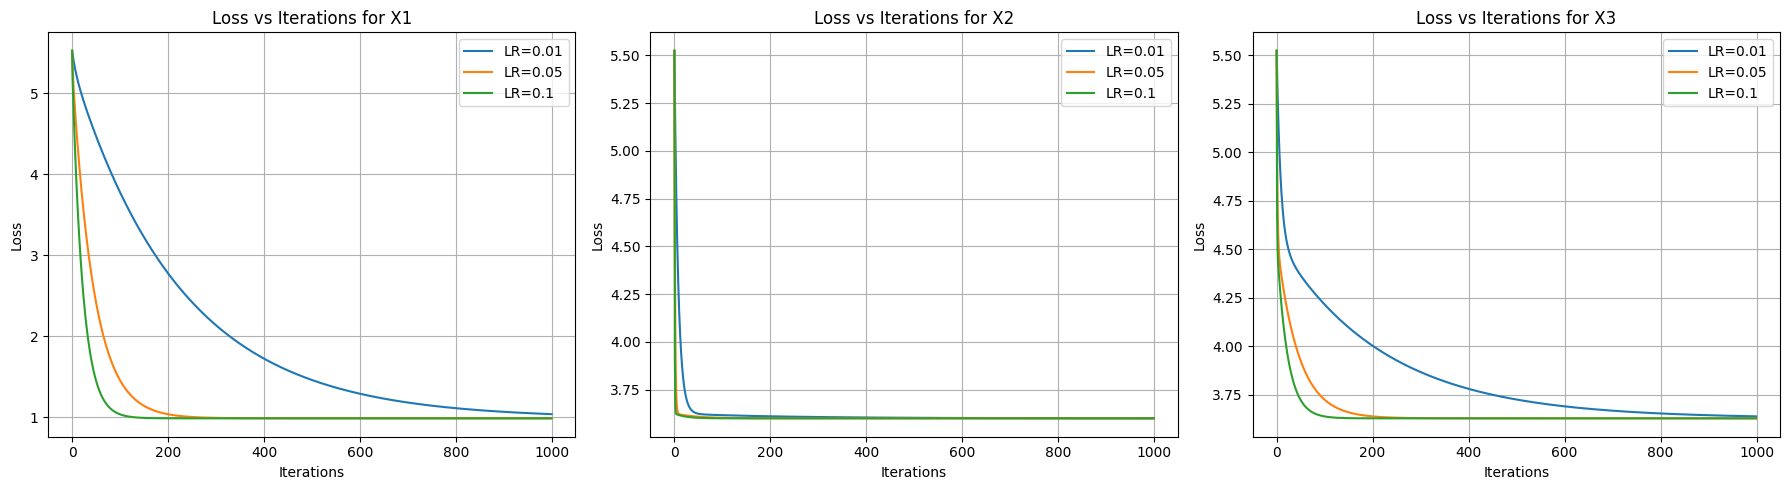

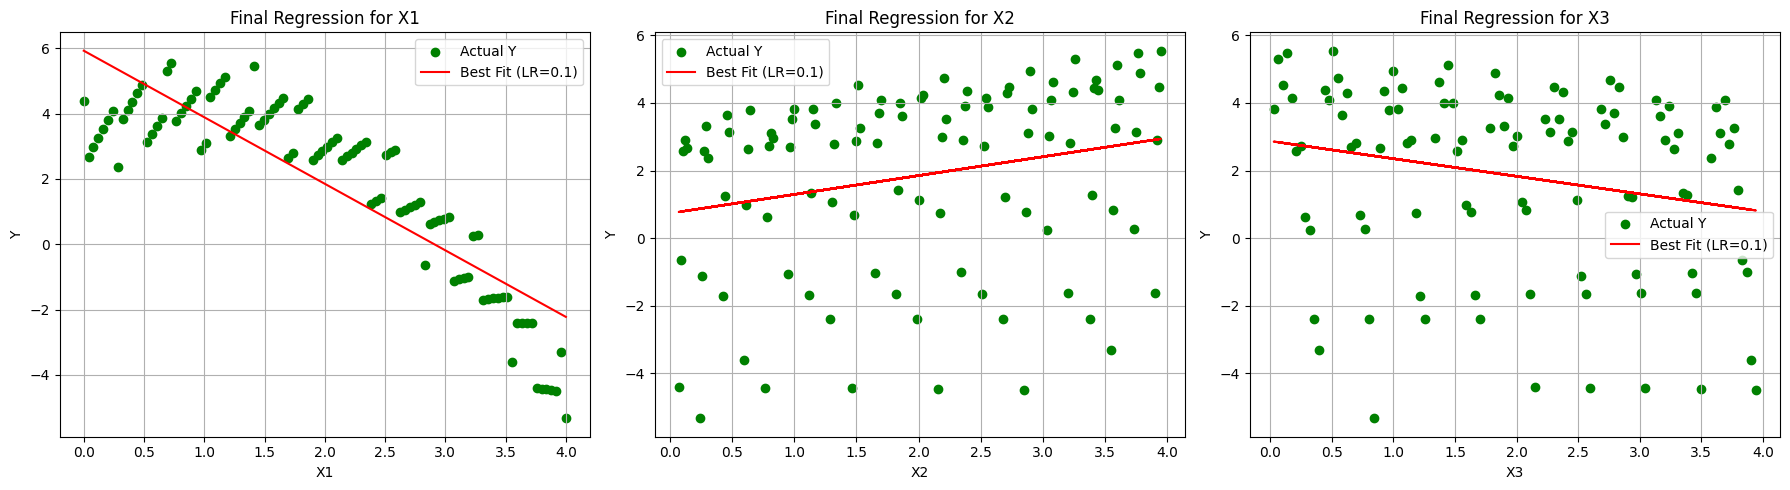


--- Problem 1: Final Models and Losses ---
X1 | LR=0.01: Y = 5.2929 + -1.7912*X1 | Final Loss = 1.0367
X1 | LR=0.05: Y = 5.9279 + -2.0383*X1 | Final Loss = 0.9850
X1 | LR=0.1: Y = 5.9279 + -2.0383*X1 | Final Loss = 0.9850
X2 | LR=0.01: Y = 0.6870 + 0.5767*X2 | Final Loss = 3.5997
X2 | LR=0.05: Y = 0.7361 + 0.5576*X2 | Final Loss = 3.5994
X2 | LR=0.1: Y = 0.7361 + 0.5576*X2 | Final Loss = 3.5994
X3 | LR=0.01: Y = 2.5912 + -0.4097*X3 | Final Loss = 3.6397
X3 | LR=0.05: Y = 2.8714 + -0.5205*X3 | Final Loss = 3.6295
X3 | LR=0.1: Y = 2.8714 + -0.5205*X3 | Final Loss = 3.6295

Lowest univariate loss: X1 (LR=0.1) = 0.984993


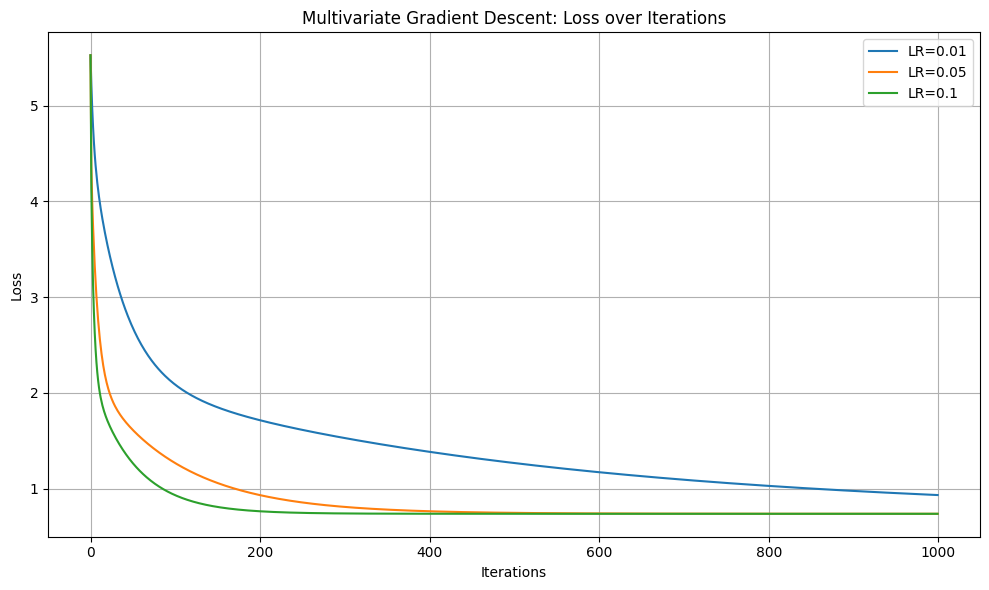


--- Final Model (Problem 2) ---
Best Learning Rate: 0.1
Y = 5.3139 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3
Final Loss: 0.7385

--- Predictions for New Inputs ---
Input 1: X1=1.0, X2=1.0, X3=1.0 --> Predicted Y = 3.5773
Input 2: X1=2.0, X2=0.0, X3=4.0 --> Predicted Y = 0.2443
Input 3: X1=3.0, X2=2.0, X3=1.0 --> Predicted Y = 0.1025


In [3]:
#Homework 1: Linear Regression with Gradient Descent


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) CSV file
try:
    df = pd.read_csv("D3.csv")
    if set(["X1","X2","X3","Y"]).issubset(df.columns):
        pass
    else:
        # if not our expected header, read again w/ no header
        df = pd.read_csv("D3.csv", header=None)
        df.columns = ["X1","X2","X3","Y"]
except Exception:
    # if path differs fallback
    df = pd.read_csv("D3.csv", header=None)
    df.columns = ["X1","X2","X3","Y"]

# 2) Cast to float ndarrays
X = df[["X1","X2","X3"]].to_numpy(dtype=float)
Y = df["Y"].to_numpy(dtype=float)

print("Data shape:", X.shape, Y.shape)
print("First row:", X[0], Y[0])

def half_mse(y_true, y_pred):
    return 0.5 * np.mean((y_pred - y_true)**2)

# ========== Problem 1: Univariate GD ==========
def gd_univariate(x, y, lr=0.05, steps=1000):
    m = y.shape[0]
    b, w = 0.0, 0.0
    hist = []
    for _ in range(steps):
        yhat = b + w * x
        err = yhat - y
        hist.append(0.5 * np.mean(err**2))
        b -= lr * (err.mean())
        w -= lr * ((err * x).mean())
    return b, w, hist

lrs = [0.01, 0.05, 0.1]
steps = 1000
uni = {}
for i, name in enumerate(["X1","X2","X3"]):
    x = X[:, i]
    uni[name] = {}
    for lr in lrs:
        b, w, h = gd_univariate(x, Y, lr=lr, steps=steps)
        uni[name][lr] = {"b": b, "w": w, "hist": h}

# Plot losses
fig, axs = plt.subplots(1, 3, figsize=(18,5))
for i, name in enumerate(["X1","X2","X3"]):
    ax = axs[i]
    for lr in lrs:
        ax.plot(uni[name][lr]["hist"], label=f"LR={lr}")
    ax.set_title(f"Loss vs Iterations for {name}")
    ax.set_xlabel("Iterations"); ax.set_ylabel("Loss"); ax.grid(True); ax.legend()
plt.tight_layout(); plt.show(); plt.close()


fig, axs = plt.subplots(1, 3, figsize=(18,5))
for i, name in enumerate(["X1","X2","X3"]):
    x = X[:, i]; y = Y
    best_lr = min(lrs, key=lambda lr: uni[name][lr]["hist"][-1])
    m = uni[name][best_lr]
    yhat = m["b"] + m["w"] * x
    axs[i].scatter(x, y, label="Actual Y", color="green")
    axs[i].plot(x, yhat, color="red", label=f"Best Fit (LR={best_lr})")
    axs[i].set_title(f"Final Regression for {name}")
    axs[i].set_xlabel(name); axs[i].set_ylabel("Y"); axs[i].grid(True); axs[i].legend()
plt.tight_layout(); plt.show(); plt.close()

print("\n--- Problem 1: Final Models and Losses ---")
for name in ["X1","X2","X3"]:
    for lr in lrs:
        m = uni[name][lr]
        print(f"{name} | LR={lr}: Y = {m['b']:.4f} + {m['w']:.4f}*{name} | Final Loss = {m['hist'][-1]:.4f}")

# should match ≈ (X1 best loss ~0.9850)
best_name, best_lr = None, None
best_loss = float("inf")
for name in ["X1","X2","X3"]:
    for lr in lrs:
        loss = uni[name][lr]["hist"][-1]
        if loss < best_loss:
            best_loss, best_name, best_lr = loss, name, lr
print(f"\nLowest univariate loss: {best_name} (LR={best_lr}) = {best_loss:.6f}")

# ========== Problem 2: Multivariate GD ==========
def gd_multivariate(X, y, lr=0.05, steps=1000):
    m, n = X.shape
    Xb = np.c_[np.ones((m,1)), X]
    theta = np.zeros(n+1)
    hist = []
    for _ in range(steps):
        yhat = Xb @ theta
        err = yhat - y
        hist.append(0.5 * np.mean(err**2))
        grad = (Xb.T @ err) / m
        theta -= lr * grad
    return theta, hist

multi = {}
for lr in lrs:
    th, h = gd_multivariate(X, Y, lr=lr, steps=steps)
    multi[lr] = {"theta": th, "hist": h, "final": h[-1]}

# Plot multivariate losses
plt.figure(figsize=(10,6))
for lr in lrs:
    plt.plot(multi[lr]["hist"], label=f"LR={lr}")
plt.title("Multivariate Gradient Descent: Loss over Iterations")
plt.xlabel("Iterations"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show(); plt.close()

best_lr_m = min(lrs, key=lambda lr: multi[lr]["final"])
best_theta = multi[best_lr_m]["theta"]
print("\n--- Final Model (Problem 2) ---")
print(f"Best Learning Rate: {best_lr_m}")
print(f"Y = {best_theta[0]:.4f} + {best_theta[1]:.4f}*X1 + {best_theta[2]:.4f}*X2 + {best_theta[3]:.4f}*X3")
print(f"Final Loss: {multi[best_lr_m]['final']:.4f}")

X_new = np.array([[1,1,1],[2,0,4],[3,2,1]], dtype=float)
X_new_b = np.c_[np.ones((X_new.shape[0],1)), X_new]
preds = X_new_b @ best_theta
print("\n--- Predictions for New Inputs ---")
for i, (row, p) in enumerate(zip(X_new, preds), start=1):
    print(f"Input {i}: X1={row[0]}, X2={row[1]}, X3={row[2]} --> Predicted Y = {p:.4f}")
